In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

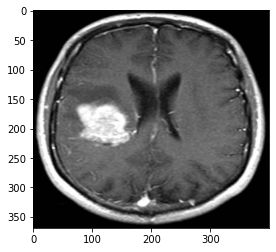

In [2]:
image = cv.imread('image/Y11.jpg')
image = cv.cvtColor(image , cv.COLOR_BGR2GRAY)
plt.imshow(image , cmap='gray')

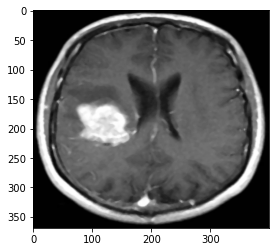

In [3]:
median = cv.medianBlur(image , 5)
plt.imshow(median , cmap='gray')

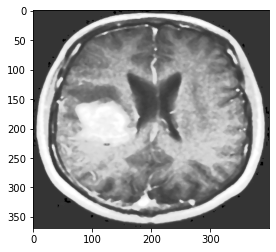

In [4]:
histogram_equlization = cv.equalizeHist(median)
plt.imshow(histogram_equlization , cmap='gray')

In [5]:
pixel_vals = histogram_equlization.reshape((-1 , 1))
print(pixel_vals.shape)

(147600, 1)


In [6]:
pixel_vals = np.float32(pixel_vals)

In [7]:

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
k = 5 # Choosing number of cluster
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS) 

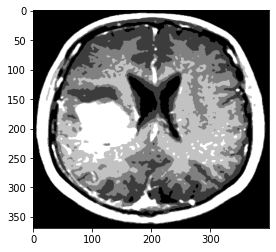

In [8]:
centers = np.uint8(centers) # convert data into 8-bit values 
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions
plt.imshow(segmented_image , cmap='gray')